In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 3].values

In [11]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [14]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])

In [17]:
X[:,0]

array(['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France',
       'Spain', 'France', 'Germany', 'France'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])

In [19]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [20]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y =  labelencoder_Y.fit_transform(Y)

In [23]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
Y_train

array([1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
Y_test

array([0, 0], dtype=int64)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [29]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

## Linear Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('studentscores.csv')
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [37]:
Y_pred = regressor.predict(X_test)

In [38]:
Y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

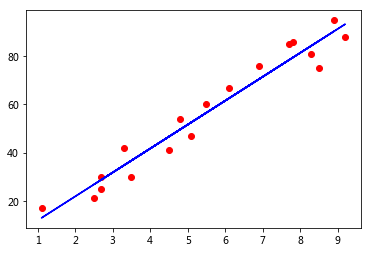

In [39]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

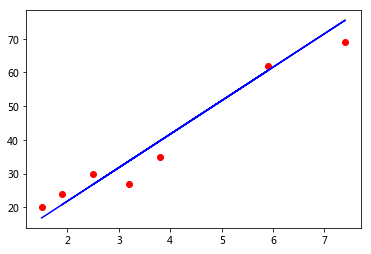

In [40]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')

## Multiple Linear Regression

In [41]:
import pandas as pd
import numpy as np

In [42]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

X[:,3] = labelencoder.fit_transform(X[:,3])

In [49]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [51]:
X = X[: , 1:]

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred = regressor.predict(X_test)

## Logistic Regression

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [71]:
dataset[:5]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [86]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [87]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

## 混淆矩阵如下

| 事实\预测 | 不买 | 买 |
| ------ | ------ | ------ |
| 不买 | 65 | 3 |
| 买 | 8 | 24 |

## K-NN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)

In [96]:
cm_knn

array([[64,  4],
       [ 3, 29]], dtype=int64)

## K-NN算法预测结果与实际情况的混淆矩阵如下

| 事实\预测 | 不买 | 买 |
| ------ | ------ | ------ |
| 不买 | 64 | 4 |
| 买 | 3 | 29 |

## TODO SVM